<center>
    <img src='pic/logo.jpg' width='400px'>
    <h2> CHƯƠNG 3: HỌC CÓ GIÁM SÁT - Phần 1 - KNN</h2>
 </center>

---
Một thuật toán học máy được gọi là học có giám sát (supervised learning) nếu việc xây dựng mô hình dự đoán mối quan hệ giữa đầu vào và đầu ra được thực hiện dựa trên các cặp (đầu vào - input, đầu ra - label) đã biết trong tập huấn luyện. Đây là nhóm thuật toán phổ biến nhất trong các thuật toán machine learning.

Tập dữ liệu học (Training data) bao gồm các quan sát (Examples, Observations), mà mỗi quan sát được gắn kèm với một giá trị đầu ra mong muốn (Label)
<img src='pic/label.png' width='600px'>

Học có giám sát bao gồm 2 loại:
* Phân loại (Classification): Nếu nhãn (y – Target) thuộc tập rời rạc và hữu hạn
* Hồi quy (Regression): Nếu nhãn (y – Target) là biến liên tục (các số thực) ví dụ như dự báo nhiệt độ, giá nhà, mức tiêu thụ điện năng…

<img src='pic/type.png' width='500px'>

**Thông tin**
1. Họ và tên: Nguyễn Văn Thanh
2. Contacts: thanhngv03@gmail.com
 

### I) GIỚI THIỆU THUẬT TOÁN KNN
---
Bản chất, KNN là thuật toán đi tìm đầu ra của một điểm dữ liệu mới bằng cách chỉ dựa trên thông tin của K điểm dữ liệu trong tập huấn luyện gần nó nhất (K-lân cận)

<img src='pic/knn.png' width='200px'>

**Xác định người láng giềng gần nhất:**
<img src='pic/knn1.png' width='300px'>

**Tính khoảng cách giữa 2 điểm A-B:**
<img src='pic/distance1_knn.png' width='400px'>
<img src='pic/distance2_knn.png' width='200px'>

Ưu điểm:
* Độ phức tạp tính toán trong quá trình huấn luyện bằng 0
* Việc dự đoán kết quả của dữ liệu mới rất đơn giản
* Không cần giả sử gì về phân phối của các class

Nhược điểm:
* KNN rất nhạy với nhiễu khi K nhỏ.
* Tính toán khoảng cách tới từng điểm dữ liệu trong trong tập huấn luyện tốn rất nhiều thời gian, đặc biệt với các CSDL có số chiều lớn và có nhiều điểm dữ liệu. K càng lớn thì độ phức tạp càng tăng.
* Lưu toàn bộ dữ liệu trong bộ nhớ ảnh hưởng tới hiệu năng của KNN

### II. THỰC HÀNH MÔ HÌNH KNN CHO BÀI TOÁN TITANIC:
---
 Xây dựng model học máy dự đoán khả năng không được cứu (0) - được cứu (1) của hành khách dựa trên các thông tin liên quan

<img src='Pic/titanic.jpg'>

In [1]:
#Gọi các thư viện sử dụng cho Project:
# Data analysis and wrangling:
import pandas as pd
import numpy as np

# visualization:
import matplotlib.pyplot as plt
%matplotlib inline
#---------------------------------------
import warnings
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\Admin\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\Admin\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\Admin\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\Admin\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found

## 1. Đọc dữ liệu đã chuẩn hóa:
---

In [2]:
#Đọc tập dữ liệu đã xử lý:
df_titanic = pd.read_csv('Data/Data_Titanic_ok.csv')

df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1309 non-null   int64
 1   Pclass    1309 non-null   int64
 2   Sex       1309 non-null   int64
 3   Age       1309 non-null   int64
 4   SibSp     1309 non-null   int64
 5   Parch     1309 non-null   int64
 6   Embarked  1309 non-null   int64
dtypes: int64(7)
memory usage: 71.7 KB


In [4]:
#Hiển thị dữ liệu Titanic:
df_titanic.sample(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
488,0,3,0,1,0,0,0
221,0,2,0,1,0,0,0
35,0,1,0,2,1,0,0
673,1,2,0,1,0,0,0
1294,0,1,0,1,0,0,0


## Mô tả các thuộc tính:
---
* 1.Survived: 0: Không được cứu - 1: Được cứu
* 2.Pclass: Hạng vé( 1 - hạng nhất, 2 - hạng 2, 3 - hạng 3)
* 3.Sex: Giới tính (0 - Male, 1 - Nữ)
* 4.Age: Độ tuổi
        * 0: Tuổi từ 0 - 16 tuổi
        * 1: Tuổi từ 17 - 32 tuổi
        * 2: Tuổi từ 32 - 48 tuổi
        * 3: Tuổi từ 48 - 64 tuổi
        * 4: Tuổi từ 64 tuổi trở lên
* 5.SibSp: Số lượng anh chị em đi cùng
* 6.Parch: Số lượng con cái, ba mẹ đi cùng
* 7.Emberked: Cảng lên tàu (0: Cảng S, 1: Cảng C, 2: Cảng Q
    


Survived
0    815
1    494
Name: count, dtype: int64


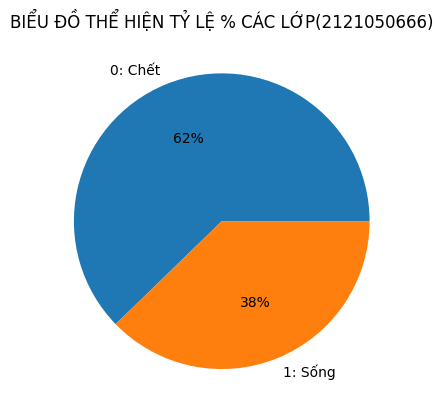

In [6]:
#Kiểm tra cân bằng dữ liệu
check = df_titanic['Survived'].value_counts()
print(check)

plt.pie(check.values,
       labels=['0: Chết', '1: Sống'],
       autopct='%.0f%%')

plt.title('BIỂU ĐỒ THỂ HIỆN TỶ LỆ % CÁC LỚP(2121050666)')
plt.show()

#--> Tập dữ liệu mất cân bằng nhẹ, nghiêng về lớp 0

## 2. Phân tách Biến Đầu vào: X - Biến phụ thuộc (Nhãn): y
---

* Biến độc lập X: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'
* Biến phụ thuộc (nhãn) y: 'Survived'

In [7]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0


In [8]:
#Lấy tiêu đề cột:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [9]:
#Lấy biến độc lập X - input 
X = df_titanic.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,1,1,0,0
1,1,1,2,1,0,1
2,3,1,1,0,0,0
3,1,1,2,1,0,0
4,3,0,2,0,0,0
...,...,...,...,...,...,...
1304,3,0,1,0,0,0
1305,1,1,2,0,0,1
1306,3,0,2,0,0,0
1307,3,0,1,0,0,0


In [10]:
#Tách biến phụ thuộc y - Output
y = df_titanic.loc[:, ['Survived']]

y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
1304,0
1305,1
1306,0
1307,0


## 3. Tách tập dữ liệu ra tập Training - Test: 
---
1. Biến độc lập X --> X_train, X_test
2. Biến phụ thuộc y --> y_train, y_test

* Tập Training set (X_train, y_train): dùng để huấn luyện mô hình (80%)
* Tập Test set (X_test, y_test): dùng để kiểm thử mô hình (20%)

In [11]:
#Gọi hàm tách dữ liệu train_test_split trong thư viện sklearn.model_selection:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   train_size=0.8,
                                                   shuffle=True,
                                                   random_state=42)##Hàm khởi tạo một con số ngẫu nhiên

print('Tập dữ liệu ban đầu: ', len(X))
print('Tập dữ liệu Train: ',len(X_train))
print('Tập dư liệu Test: ', len(X_test))

Tập dữ liệu ban đầu:  1309
Tập dữ liệu Train:  1047
Tập dư liệu Test:  262


In [12]:
1309*0.8


1047.2

In [13]:
#Tập X_train:
X_train



,Pclass,Sex,Age,SibSp,Parch,Embarked
772,2,1,3,0,0,0
543,2,0,1,1,0,0
289,3,1,1,0,0,2
10,3,1,0,1,1,0
147,3,1,0,2,2,0
...,...,...,...,...,...,...
1095,2,0,1,0,0,0
1130,1,1,2,1,0,1
1294,1,0,1,0,0,0
860,3,0,2,2,0,0


In [14]:
#Tập y train
y_train 

,Survived
772,0
543,1
289,1
10,1
147,0
...,...
1095,0
1130,1
1294,0
860,0


## 4. Xây dựng mô hình KNN cho bài toán phân lớp
---
Khai báo model KNN sử dụng thư viện sklearn:
sklearn.neighbors --> KNeighborsClassifier

In [15]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_titanic = KNeighborsClassifier(n_neighbors=5,
                                  p=2)

#Hiển thị danh sách tham số: Model.get_params()
KNN_titanic.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Một số tham số quan trọng của thuật toán KNN trong thư viện sklearn:
Tham khảo KNN của thư viện sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


1. n_neighbors: số điểm lân cận sử dụng (default = 5)
2. weights: có tính trọng số của các điểm lân cận hay không?
    * uniform: Tất cả các điểm lân cận đều có trọng số như nhau (default)
    * distance: Các điểm lân cận gần hơn sẽ được đánh trọng số cao hơn
3. algorithm: Thuật toán sử dụng để tính các điểm lân cận: ball_tree, kd_tree, brute, auto (default)
4. p: xác định khoảng cách tính theo manhattan (p=1) hay tính theo euclidean (p=2 default)


## 5. Huấn luyện mô hình
---
Sử dụng tập dữ liệu Training set để huấn luyện mô hình

In [16]:
#Thực hiện huấn luyện với dữ liệu tập train: Model.fit(X_train,y_train)
KNN_titanic.fit(X_train, y_train) #Hàm fit để huấn luyện mô hình 


KNeighborsClassifier()

In [17]:
#Độ chính xác của Model trên tập Huấn luyện: Model.score(X_train,y_train)
acc_train = KNN_titanic.score(X_train, y_train) #Hàm score để đánh giá mô hình 

print('Độ chính xác của mô hình trên tập train: ', round(acc_train,3))


Độ chính xác của mô hình trên tập train:  0.874


## 6. Đánh giá độ chính xác của mô hình trên tập Test
---

In [18]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
y_pred = KNN_titanic.predict(X_test)

In [19]:
#Kết quả dự đoán của mô hình trên tập test:
print(len(y_pred))
print(y_pred)

262
[0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1
 1 1 1]


In [21]:
#So sánh kết quả dự đoán với kết quả thật với 20 hành khách đầu tiên:
#y_pred: Giá trị mà mô hình dự đoán trên tập test 
#y_test: (Ground truth) Giá trị thật của tập test

print('y_pred', y_pred[:20])
print('y_test', y_test[:20].values.ravel()) #Hàm ravel để chuyển về ma trận cho dễ nhìn 

y_pred [0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0]
y_test [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0]


**Thông số để đánh giá độ chính xác mô hình phân lớp:**

---
1. Đếm số lượng mẫu dự đoán đúng trong tổng số mẫu của tập test:
2. Accauracy: là cách đơn giản và hay được sử dụng nhất; Tính tỷ lệ % giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.
3. Sử dụng ma trận nhầm lẫn (Confusion matrix)

In [22]:
#Import module accuracy_score trong thư viện sklearn.metrics để đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

#1. Đếm tổng số mẫu dự đoán đúng trên tập Test: normalize=False
acc_test_num = accuracy_score(y_test, y_pred, normalize=False)

print('Tổng số mẫu dự đoán đúng trong tập test :',acc_test_num, '/',len(y_test))
print('Tổng số mẫu dự đoán sai: ', len(y_test) - acc_test_num)

Tổng số mẫu dự đoán đúng trong tập test : 217.0 / 262
Tổng số mẫu dự đoán sai:  45.0


In [34]:
217/262


0.8282442748091603

In [23]:
#2.Độ chính xác (Accuracy) theo tỷ lệ % 
#(số mẫu dự đoán đúng/tổng số mẫu của tập test): normalize=True
acc_test = accuracy_score(y_test, y_pred, normalize=True)

print('Độ chính xác trên tập Test: ', round(acc_test,3))

Độ chính xác trên tập Test:  0.828


#### Sử dụng Confusion matrix kiểm tra độ chính xác của model
---
Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng (hoặc tổng có bao nhiêu mẫu phân loại đúng) mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là confusion matrix.

<img src='Pic/confusionmarix.jpg' width='400px'>

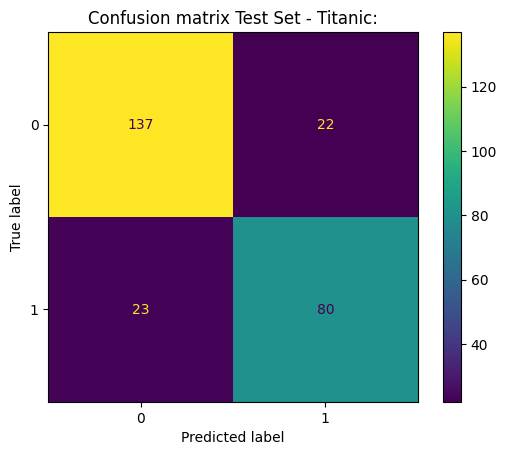

In [24]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Tính ma trận confusion matrix:
cnf_matrix_titanic = confusion_matrix(y_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set - Titanic:')
plt.show()

In [25]:
138+23+80+22

263

In [39]:
print('Độ chính xác cho lớp 0: ', 138/(138+21))
print('Độ chính xác cho lớp 1: ', 78/(78+25))
print('Độ chính xác cho cả tập Test: ', (138+78)/(138+21+78+25))

#Mô hình dự đoán tốt hơn cho lớp 0, kém hơn cho lớp 1

Độ chính xác cho lớp 0:  0.8679245283018868
Độ chính xác cho lớp 1:  0.7572815533980582
Độ chính xác cho cả tập Test:  0.8244274809160306


**NHÂN XÉT**

- Train:87,5%

Thấp

ok

**NHẬN XÉT:**



## 7. Thay đổi tham số của mô hình
---
* n_neighbors: số điểm lân cận (K nên chọn là số lẻ)
* weights: Đánh trọng số cho các điểm lân cận**
    * Trong kỹ thuật major voting bên trên, mỗi trong 11 điểm gần nhất được coi là có vai trò như nhau và giá trị lá phiếu của mỗi điểm này là như nhau. Trong thực tế ta thấy rằng những điểm gần hơn nên có trọng số cao hơn (càng thân cận thì càng tin tưởng). Vậy nên sẽ đánh trọng số khác nhau cho mỗi trong 11 điểm gần nhất này. Cách đánh trọng số phải thoải mãn điều kiện là một điểm càng gần điểm test data thì phải được đánh trọng số càng cao (tin tưởng hơn).

    * Scikit-learn giúp chúng ta đơn giản hóa việc này bằng cách gán gía trị weights = 'distance'. (Giá trị mặc định của weights là 'uniform', tương ứng với việc coi tất cả các điểm lân cận có giá trị như nhau như ở trên).

In [26]:
# Khai bảo mô hình mới bằng cách Thay đổi tham số n_neighbors, weights:
KNN_titanic2 = KNeighborsClassifier(n_neighbors=11,
                                   p=1,
                                   weights='distance')

#Các tham số mới của Model:
KNN_titanic2.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 1,
 'weights': 'distance'}

In [27]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_titanic2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [28]:
#Độ chính xác của Model trên tập Huấn luyện
acc_train2 = KNN_titanic2.score(X_train,y_train)

print('Độ chính xác trên tập huấn luyện:', round(acc_train2*100,2))

Độ chính xác trên tập huấn luyện: 89.88


In [29]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred2 = KNN_titanic2.predict(X_test)

print("Kết quả dự đoán hành khách được cứu hay không được cứu trên tập dữ liệu TEST:")
print("Kết quả cho 20 hành khách đầu tiên:")
print("Predicted labels: ", y_pred2[:20])
print("Ground truth    : ", y_test[:20].values.ravel())

Kết quả dự đoán hành khách được cứu hay không được cứu trên tập dữ liệu TEST:
Kết quả cho 20 hành khách đầu tiên:
Predicted labels:  [0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0]
Ground truth    :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0]


In [30]:
#1.Đếm số mẫu dự đoán đúng:
acc_test_num2 = accuracy_score(y_test, y_pred2, 
                       normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc_test_num2, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 216.0  / 262


In [31]:
#2.Tính độ chính xác %:
acc_test2 = accuracy_score(y_test, y_pred2,
                       normalize=True)

print('Độ chính xác của mô hình 2:', acc_test2)
print('Độ chính xác theo %:', round(acc_test2*100,2))

Độ chính xác của mô hình 2: 0.8244274809160306
Độ chính xác theo %: 82.44


Confusion matrix - Titanic:
[[140  19]
 [ 27  76]]


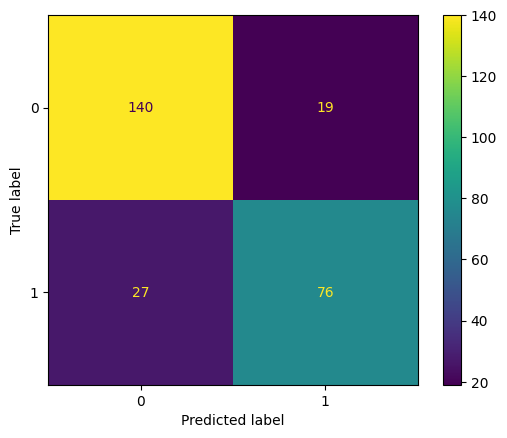

In [32]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận
cnf_matrix_titanic = confusion_matrix(y_test,y_pred2)

#Hiển thị ma trân:
print('Confusion matrix - Titanic:')
print(cnf_matrix_titanic)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

In [48]:
#Giả sử mô hình KNN_titanic2 đạt độ chính xác yêu cầu(best fit) 

## 8. Sử dụng mô hình
---
* Pclass: Hạng vé( 1 - hạng nhất, 2 - hạng 2, 3 - hạng 3)
* Sex: Giới tính (0 - Male, 1 - Nữ)
* Age: Độ tuổi
        * 0: Tuổi từ 0 - 16 tuổi
        * 1: Tuổi từ 17 - 32 tuổi
        * 2: Tuổi từ 32 - 48 tuổi
        * 3: Tuổi từ 48 - 64 tuổi
        * 4: Tuổi từ 64 tuổi trở lên
* SibSp: Số lượng anh chị em đi cùng
* Parch: Số lượng con cái, ba mẹ đi cùng
* Emberked: Cảng lên tàu (0: Cảng S, 1: Cảng C, 2: Cảng Q)

### Example 1:
---
Cho biết Hành khách số 1 là một cô gái, 22 tuổi, mua vé hạng 3, đi tàu một mình, lên tàu ở cảng Q ---> Cho biết hành khách này Được cứu hay không được cứu?

In [33]:
#Khai báo Dữ liệu hành khách 1:
customer1= np.array([[3, 1, 1, 0, 0, 2]]) 

print('Thông tin hành khác số 1: ', customer1)


Thông tin hành khác số 1:  [[3 1 1 0 0 2]]


In [34]:
#Sử dụng mô hình để dự đoán cho hành khách 1:
y_pred_customer1 = KNN_titanic2.predict(customer1)
print(y_pred_customer1)

if(y_pred_customer1 == 0):
    print ('AI said: Bạn không được cứu')
else:
    print('AI said: Bạn được cứu ')




[1]
AI said: Bạn được cứu 


### Example 2:
---
Cho biết Hành khách số 2 là một người đàn ông trung niên, 40 tuổi, mua vé hạng 1, đi tàu với vợ, lên tàu ở cảng S ---> Cho biết hành khách này Được cứu hay không được cứu?


In [35]:
#Khai báo Dữ liệu hành khách 2:
customer2 = np.array([[1, 0, 3, 1, 0, 0]])

print('Thông tin hành khác số 2: ', customer2)


Thông tin hành khác số 2:  [[1 0 3 1 0 0]]


In [36]:
#Sử dụng mô hình để dự đoán cho hành khách 2:

#Sử dụng mô hình để dự đoán cho hành khách 1:
y_pred_customer2 = KNN_titanic2.predict(customer2)
print(y_pred_customer1)

if(y_pred_customer2 == 0):
    print ('AI said: Bạn không được cứu')
else:
    print('AI said: Bạn được cứu ')




[1]
AI said: Bạn không được cứu


## PHẦN BÀI TẬP THỰC HÀNH CHƯƠNG 3 - PHẦN 1:
---
Xây dựng mô hình học máy với thuật toán KNN dự đoán một bệnh nhân u vú là lành tính hay ác tính. Sinh viên sử dụng tập dữ liệu bệnh nhân u vú đã tiền xử lý ở Chương 2; 

1. Kiểm tra mức độ cân bằng dữ liệu

2. Phân tách các biến Độc lập (X) - Phụ thuộc (Y) tương ứng

3. Chia tập dữ liệu thành 2 phần Train - Test với tỷ lệ 75% - 25%

4. Xây dựng model dự đoán bệnh nhân bị bệnh u vú lành tính - ác tính với thuật toán K người láng giềng gần nhất (KNN). Tùy chỉnh tham số n_neighbors, weight, p để thu được mô hình có độ chính xác tốt nhất trên tập Train và Test.

**Hiển thị các kết quả sau của model:**

    a)Độ chính xác của model (accuracy) trên tập Train – Test
    b)Tổng số mẫu dự đoán đúng - sai trên tập Test 
    c)Ma trận confusion matrix trên tập Test

5. Dự đoán với mô hình xây dựng được
- Bệnh nhân 1 có các thông số như sau:

    * Age:  20 tuổi;
    * Weight: 65 Kg
    * Shape: Round;
    * Margin: Circumscribed
    * Density: Low

- Bệnh nhân 2 có các thông số như sau:  
    * Age:  64 tuổi;
    * Weight: 75 kg
    * Shape: Round;
    * Margin: Circumscribed
    * Density: High

Sử dụng model ở trên dự đoán xem bệnh nhân 1, 2  này bị u lành tính  hay ác tính;




In [ ]:
#{SINH VIÊN LÀM BÀI TẬP VÀO ĐÂY!}

#Đọc tập dữ liệu đã xử lý
df_practice = pd.read_csv('Data/Data_Practice_ML_OK.csv')
df_practice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      961 non-null    int64
 1   Weight   961 non-null    int64
 2   Shape    961 non-null    int64
 3   Margin   961 non-null    int64
 4   Density  961 non-null    int64
 5   Target   961 non-null    int64
dtypes: int64(6)
memory usage: 45.2 KB


In [ ]:
#Hiển thị tập dữ liệu Practice:
df_practice.sample(5)


,Age,Weight,Shape,Margin,Density,Target
426,3,50,1,0,0,1
380,2,67,1,0,0,0
716,1,77,2,1,2,0
610,2,66,0,2,0,1
932,2,46,2,0,2,0


**Mô tả các thuộc tính: **

1. Age: Thuộc tính cho biết tuổi của bệnh nhân ( 0: dưới 3o tuổi, 1: từ 31-->44 tuổi,2: từ 44-->57 tuổi,
    3: từ 57-->70 tuổi,4: 70-->83 tuổi, 5: trên 83 tuổi)
2. Weight: Thuộc tính cho biết cân nặng của bệnh nhân (Kg)
3.  Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: {obular': 1,'Round':2,'Irregular':3,'Oval':4}
4.  Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị:{'Spiculated': 1,'Circumscribed':2,'ill-defined':3,'Obscured':4,'Microlobulated':5}
5. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: {{'Low': 1,'High':2,'Iso':3,'Fat-containing':4}
6. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)


---

Target
0    516
1    445
Name: count, dtype: int64


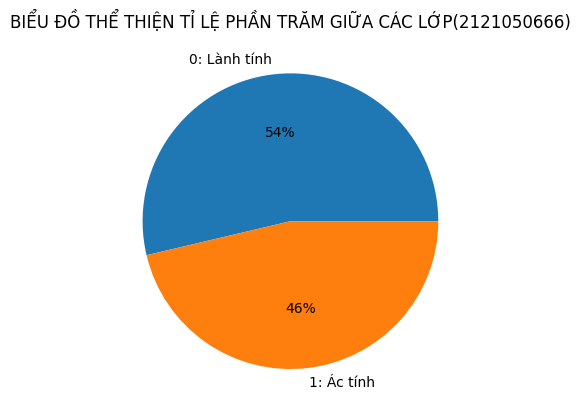

In [ ]:
#Kiểm tra cân bằng dữ liệu:

check_01 = df_practice['Target'].value_counts()
print(check_01)

#Vẽ biểu đồ
plt.pie(check_01.values,
       labels = ['0: Lành tính', '1: Ác tính'],
       autopct='%.0f%%')
plt.title('BIỂU ĐỒ THỂ THIỆN TỈ LỆ PHẦN TRĂM GIỮA CÁC LỚP(2121050666)')
plt.show()

## 2. Phân tách Biến Đầu vào: X - Biến phụ thuộc (Nhãn): y
---

* Biến độc lập X: 'Age', 'Weight', 'Shape', 'Margin', 'Density'
* Biến phụ thuộc (nhãn) y: 'Target'

In [41]:
df_practice.columns

Index(['Age', 'Weight', 'Shape', 'Margin', 'Density', 'Target'], dtype='object')

In [43]:
#Lấy thuộc tính độc lập X
X_1 = df_practice.loc[:,['Age', 'Weight', 'Shape', 'Margin', 'Density']]
X_1

,Age,Weight,Shape,Margin,Density
0,3,68,3,2,0
1,1,72,1,0,0
2,3,64,0,2,0
3,0,61,1,0,0
4,4,60,1,2,0
...,...,...,...,...,...
956,2,77,2,0,0
957,2,66,0,2,0
958,3,72,0,2,0
959,3,66,0,2,0


**Phân loại cột 'Weight' thành các nhóm: 
0: <= 52, 1: 52-59, 2: 59-66, 3: 66-73, 4: > 73

In [44]:
df_practice.loc[ df_practice['Weight'] <= 52, 'Weight'] = 0
df_practice.loc[(df_practice['Weight'] > 52) & (df_practice['Weight'] <= 59), 'Weight'] = 1
df_practice.loc[(df_practice['Weight'] > 59) & (df_practice['Weight'] <= 66), 'Weight'] = 2
df_practice.loc[(df_practice['Weight'] > 66) & (df_practice['Weight'] <= 73), 'Weight'] = 3
df_practice.loc[(df_practice['Weight'] > 73) , 'Weight'] = 4

In [45]:
df_practice

,Age,Weight,Shape,Margin,Density,Target
0,3,3,3,2,0,1
1,1,3,1,0,0,1
2,3,2,0,2,0,1
3,0,2,1,0,0,0
4,4,2,1,2,0,1
...,...,...,...,...,...,...
956,2,4,2,0,0,0
957,2,2,0,2,0,1
958,3,3,0,2,0,0
959,3,2,0,2,0,1


In [46]:
Y_1 = df_practice.loc[:,['Target']]
Y_1

,Target
0,1
1,1
2,1
3,0
4,1
...,...
956,0
957,1
958,0
959,1


## 3. Tách tập dữ liệu ra tập Training - Test: 
---
1. Biến độc lập X --> X_train, X_test
2. Biến phụ thuộc y --> y_train, y_test

* Tập Training set (X_train, y_train): dùng để huấn luyện mô hình (80%)
* Tập Test set (X_test, y_test): dùng để kiểm thử mô hình (20%)

In [47]:
#Gọi hàm tách dữ liệu train_test_split trong thư viện sklearn.model_selection:
from sklearn.model_selection import train_test_split

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,
                                                           Y_1,
                                                           train_size = 0.75,
                                                           shuffle=True,
                                                           random_state = 42)
print('Tổng số mẫu trong tập dữ liệu',len(X_1))
print('Tổng số mẫu trong tập Train',len(X_1_train))
print('Tổng số mẫu trong tập Test',len(X_1_test))

Tổng số mẫu trong tập dữ liệu 961
Tổng số mẫu trong tập Train 720
Tổng số mẫu trong tập Test 241


In [48]:
#Tập X train
X_1_train


,Age,Weight,Shape,Margin,Density
309,2,61,1,0,0
29,2,52,0,1,0
55,1,69,3,1,0
482,1,45,2,3,0
332,2,56,0,2,0
...,...,...,...,...,...
106,1,58,1,0,0
270,3,47,0,1,0
860,3,64,0,2,0
435,3,71,0,2,0


In [49]:
#Tập y train 
y_1_train

,Target
309,0
29,0
55,0
482,0
332,1
...,...
106,1
270,1
860,1
435,1


## 4. Xây dựng mô hình KNN cho bài toán phân lớp
---
Khai báo model KNN sử dụng thư viện sklearn:
sklearn.neighbors --> KNeighborsClassifier

In [51]:
#Gọi thư viện Sklearn với thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định 
KNN_practice = KNeighborsClassifier(n_neighbors=3,
                                    p=2)
#Hiển thị danh sách tham số: Model.get_params()
KNN_practice.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

## 5. Huấn luyện mô hình
---
Sử dụng tập dữ liệu Training set để huấn luyện mô hình

In [52]:
#Thực hiện huấn luyện với dữ liệu tập train: Model.fit(X_train,y_train)
KNN_practice.fit(X_1_train,y_1_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
#Độ chính xác của Model trên tập Huấn luyện: Model.score(X_train,y_train)
acc_train1 = KNN_practice.score(X_1_train,y_1_train)

print('Độ chính xác của mô hình: ', round(acc_train1,3))

Độ chính xác của mô hình:  0.844


## 6. Đánh giá độ chính xác của mô hình trên tập Test
---

In [55]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
y_1_pred = KNN_practice.predict(X_1_test)

In [56]:
#Kết quả dự đoán của mô hình trên tập test:
print(len(y_1_pred))
print(y_1_pred)

241
[0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0]


In [57]:
#So sánh kết quả dự đoán với kết quả thật với 20 hành khách đầu tiên:
# y1_pred giá trị  dự đoán của mô hình  trên tập Test
# y1_test : Ground truth _ Giá trị thật của tập Test
print('y_1_pred', y_1_pred[:20])
print('y_1_test',y_1_test[:20].values.ravel())

y_1_pred [0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1]
y_1_test [0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]


In [58]:
#Import module accuracy_score trong thư viện sklearn.metrics để đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

#1. Đếm tổng số mẫu dự đoán đúng trên tập Test: normalize=False
acc_test_num_1 = accuracy_score(y_1_test,y_1_pred,normalize=False)
print(' TOng so mau trên tập test:', acc_test_num_1,"/",len(y_1_test))
print('Số mẫu dự đoán sai:' ,len(y_1_test)-acc_test_num_1)

 TOng so mau trên tập test: 182.0 / 241
Số mẫu dự đoán sai: 59.0


In [59]:
# 2.Độ chính xác (Accuracy) theo tỷ lệ % 
#(số mẫu dự đoán đúng/tổng số mẫu của tập test): normalize=True
acc_test_1 = accuracy_score(y_1_test,y_1_pred,normalize=True)

print(' Độ chính xác trên tập Test:',round(acc_test_1,3))

 Độ chính xác trên tập Test: 0.755


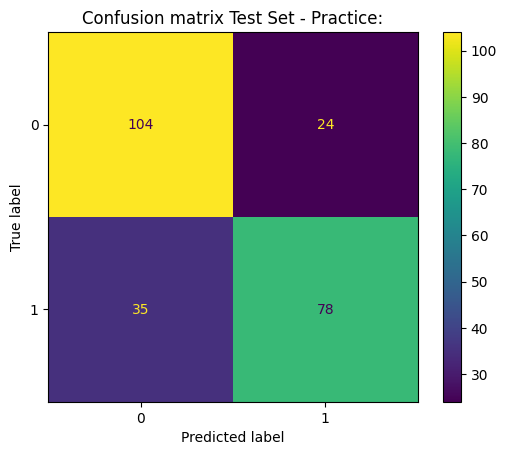

In [60]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Tính ma trận confusion matrix:
cnf_matrix_practice = confusion_matrix(y_1_test,y_1_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_1_test, y_1_pred)
plt.title('Confusion matrix Test Set - Practice:')
plt.show()

In [61]:
print('Độ chính xác của model cho lớp 0:',80/(80+21))
print('Độ chính xác của model cho lớp 1:',62/(62+30))

Độ chính xác của model cho lớp 0: 0.7920792079207921
Độ chính xác của model cho lớp 1: 0.6739130434782609


**NHẬN XÉT:**

- Train:84%
- Test : 75%
--> Underfitting

In [63]:
# Khai bảo mô hình mới bằng cách Thay đổi tham số n_neighbors, weights:
KNN_practice_2 = KNeighborsClassifier(n_neighbors=19,
                                   p=1,
                                   weights ='uniform')

#Các tham số mới của Model:
KNN_practice_2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 1,
 'weights': 'uniform'}

In [64]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_practice_2.fit(X_1_train,y_1_train)

KNeighborsClassifier(n_neighbors=19, p=1)

In [65]:
#Độ chính xác của Model trên tập Huấn luyện
acc_train_3 = KNN_practice_2.score(X_1_train,y_1_train)

print('Độ chính xác trên tập huấn luyện:', round(acc_train_3*100,2))

Độ chính xác trên tập huấn luyện: 78.33


In [68]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred_3 = KNN_practice_2.predict(X_1_test)

print("Kết quả dự đoán bệnh nhân có khối u lành tính hay ác tính trên tập dữ liệu TEST:")
print("Kết quả cho 20 bệnh nhân đầu tiên:")
print("Predicted labels: ", y_pred_3[:20])
print("Ground truth    : ", y_1_test[:20].values.ravel())

Kết quả dự đoán bệnh nhân có khối u lành tính hay ác tính trên tập dữ liệu TEST:
Kết quả cho 20 bệnh nhân đầu tiên:
Predicted labels:  [0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1]
Ground truth    :  [0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]


In [69]:
acc_test_num_3 = accuracy_score(y_1_test, y_pred_3, 
                       normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc_test_num_3, ' /', len(y_1_test))

Tổng số mẫu dự đoán đúng: 191.0  / 241


In [70]:
#2.Tính độ chính xác %:
acc_test_3 = accuracy_score(y_1_test, y_pred_3,
                       normalize=True)

print('Độ chính xác của mô hình 2:', acc_test_3)
print('Độ chính xác theo %:', round(acc_test_3*100,2))

Độ chính xác của mô hình 2: 0.7925311203319502
Độ chính xác theo %: 79.25


Confusion matrix - Practice:
[[106  22]
 [ 28  85]]


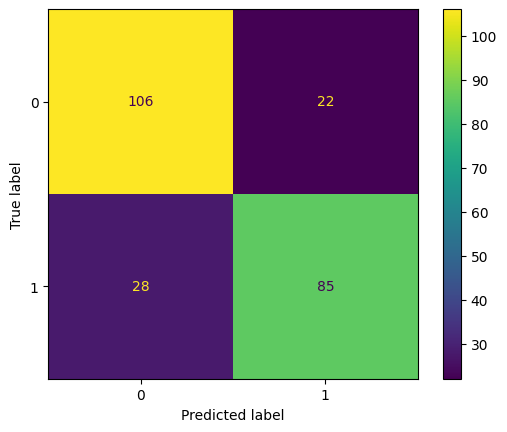

In [71]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận
cnf_matrix_practice_2 = confusion_matrix(y_1_test,y_pred_3)

#Hiển thị ma trân:
print('Confusion matrix - Practice:')
print(cnf_matrix_practice_2)
ConfusionMatrixDisplay.from_predictions(y_1_test, y_pred_3)
plt.show()


**NHẬN XÉT:**

- Train:78.33%
- Test : 79.25%
--> Best Fit

In [72]:
#Khai báo Dữ liệu bệnh nhân 1:
Customer_1 = np.array([[0,2,2,2,1]])

print('Bệnh nhân số 1:', Customer_1)


Bệnh nhân số 1: [[0 2 2 2 1]]


In [76]:
#Sử dụng mô hình để dự đoán cho hành khách 1:
y_pred_customer_1 = KNN_practice_2.predict(Customer_1)
print(y_pred_customer_1)

if(y_pred_customer_1==0):
    print(' AI Said: Bạn có khối u lành tính')
else:
    print('AI said:  Nguy cấp rồi bạn đã có khối u ác tính')


[0]
 AI Said: Bạn có khối u lành tính


**Bệnh nhân 1 có các thông số như sau:

Age: 20 tuổi;
Weight: 65 Kg
Shape: Round;
Margin: Circumscribed
Density: Low

**Bệnh nhân 2 có các thông số như sau:

Age: 64 tuổi;
Weight: 75 kg
Shape: Round;
Margin: Circumscribed
Density: High

In [74]:
#Khai báo Dữ liệu bênh nhân 2:
Customer_2 = np.array([[4,4,2,2,2]])

print('Bệnh nhân số 2:', Customer_2)

Bệnh nhân số 2: [[4 4 2 2 2]]


In [77]:
#Sử dụng mô hình để dự đoán cho hành khách 2:
y_pred_customer_2 = KNN_practice_2.predict(Customer_2)
print(y_pred_customer_2)

if(y_pred_customer_1==0):
    print(' AI Said: Bạn có khối u lành tính')
else:
    print('AI said:  Nguy cấp rồi bạn đã có khối u ác tính')


[1]
 AI Said: Bạn có khối u lành tính


In [78]:
#Khai báo Dữ liệu bênh nhân 3:
Customer_3 = np.array([[4,4,2,3,1]])

print('Bênh nhân số 3:', Customer_3)

Bênh nhân số 3: [[4 4 2 3 1]]


In [80]:
#Sử dụng mô hình để dự đoán cho hành khách 3:
y_pred_customer_3 = KNN_practice_2.predict(Customer_3)
print(y_pred_customer_3)

if(y_pred_customer_3==0):
    print(' AI Said: Bạn có khối u lành tính')
else:
    print('AI said:  Nguy cấp rồi bạn đã có khối u ác tính')


[1]
AI said:  Nguy cấp rồi bạn đã có khối u ác tính
